In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import  matplotlib.pyplot as plt 
%matplotlib inline

In [11]:
data = pd.read_csv('Task2.csv')
data.head()


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,31,1:O1,Direct free kick,NaN
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,89,NaN,NaN,NaN
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,9,1:OO,Header,Javier Mascherano
3,Dec-13,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,26,2:O1,Right-footed shot,Xabi Alonso
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,O:1,Left-footed shot,Neymar


In [9]:
data.columns

Index(['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            1511 non-null   object
 1   Competition       1497 non-null   object
 2   Matchday          1507 non-null   object
 3   Date              1498 non-null   object
 4   Venue             1504 non-null   object
 5   Club              1508 non-null   object
 6   Opponent          1500 non-null   object
 7   Result            1500 non-null   object
 8   Playing_Position  1435 non-null   object
 9   Minute            1500 non-null   object
 10  At_score          1507 non-null   object
 11  Type              1475 non-null   object
 12  Goal_assist       1012 non-null   object
dtypes: object(13)
memory usage: 159.0+ KB


In [13]:
data.describe()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,1511,1497,1507,1498,1504,1508,1500,1500,1435,1500,1507,1475,1012
unique,22,21,53,850,2,7,174,72,5,108,54,12,159
top,14/15,LaLiga,Group Stage,11/22/14,H,FC Barcelona,Sevilla FC,3:OO,CF,9O,1:OO,Left-footed shot,Luis Suarez
freq,127,831,164,8,875,717,71,99,552,32,219,589,52


In [58]:
data.isnull().sum()

Season               53
Competition           0
Matchday            492
Date                 66
Venue                60
Club                 56
Opponent              0
Result               64
Playing_Position      0
Minute               64
At_score              0
Type                  0
Goal_assist           0
Goals                 0
dtype: int64

In [68]:
#HANDLING MISSING VALUES 
# Function to clean the dates, replacing wrong characters
def clean_dates(date):
    if isinstance(date, str):
        date = date.replace('O', '0').replace('-', '/')
    return date

# Apply date correction
data['Date'] = data['Date'].apply(clean_dates)

# Replace 'O' with '0' for incorrect numeric values in relevant columns
def clean_numeric_values(value):
    if isinstance(value, str):
        value = value.replace('O', '0')
    return value

# Apply numeric correction to relevant columns
data['Season'] = data['Season'].apply(clean_numeric_values)
data['Matchday'] = data['Matchday'].apply(clean_numeric_values)
data['Result'] = data['Result'].apply(clean_numeric_values)
data['Minute'] = data['Minute'].apply(clean_numeric_values)
data['At_score'] = data['At_score'].apply(clean_numeric_values)

# Fill missing values by directly assigning back to the column
data['Competition'] = data['Competition'].fillna('Unknown')
data['Matchday'] = data['Matchday'].fillna('Unknown')
data['Playing_Position'] = data['Playing_Position'].fillna('Unknown')
data['Opponent'] = data['Opponent'].fillna('Unknown')
data['Type'] = data['Type'].fillna('Unknown')
data['Goal_assist'] = data['Goal_assist'].fillna('None')
data['At_score'] = data['At_score'].fillna('0:0')

# Fill missing values
data['Season'] = data['Season'].fillna('Unknown')
data['Matchday'] = data['Matchday'].fillna('Unknown')
data['Date'] = data['Date'].fillna('Unknown Date')
data['Venue'] = data['Venue'].fillna('Unknown')
data['Club'] = data['Club'].fillna('Unknown')
data['Result'] = data['Result'].fillna('N/A')
data['Minute'] = data['Minute'].fillna('0')

# Check the cleaned data
data.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Goals
0,15/16,LaLiga,26.0,2016-02-28 00:00:00,H,FC Barcelona,Sevilla FC,2-01,RW,31,1:01,Direct free kick,None,2
1,20/21,Unknown,Unknown,Unknown Date,A,FC Barcelona,Unknown,1-00,Unknown,89,0:0,Unknown,None,1
2,16/17,LaLiga,25.0,2017-03-01 00:00:00,H,FC Barcelona,Sporting GijÃ³n,6-01,RW,9,1:00,Header,Javier Mascherano,6
3,Dec-13,LaLiga,36.0,2013-05-08 00:00:00,H,Real Madrid,Malaga CF,6-02,LW,26,2:01,Right-footed shot,Xabi Alonso,6
4,22/23,UEFA Champions League,Unknown,2022-10-05 00:00:00,A,Paris Saint-Germain,SL Benfica,1-1,AM,22,0:1,Left-footed shot,Neymar,1


In [70]:
# Check the updated data
data.isnull().sum()

Season              0
Competition         0
Matchday            0
Date                0
Venue               0
Club                0
Opponent            0
Result              0
Playing_Position    0
Minute              0
At_score            0
Type                0
Goal_assist         0
Goals               0
dtype: int64

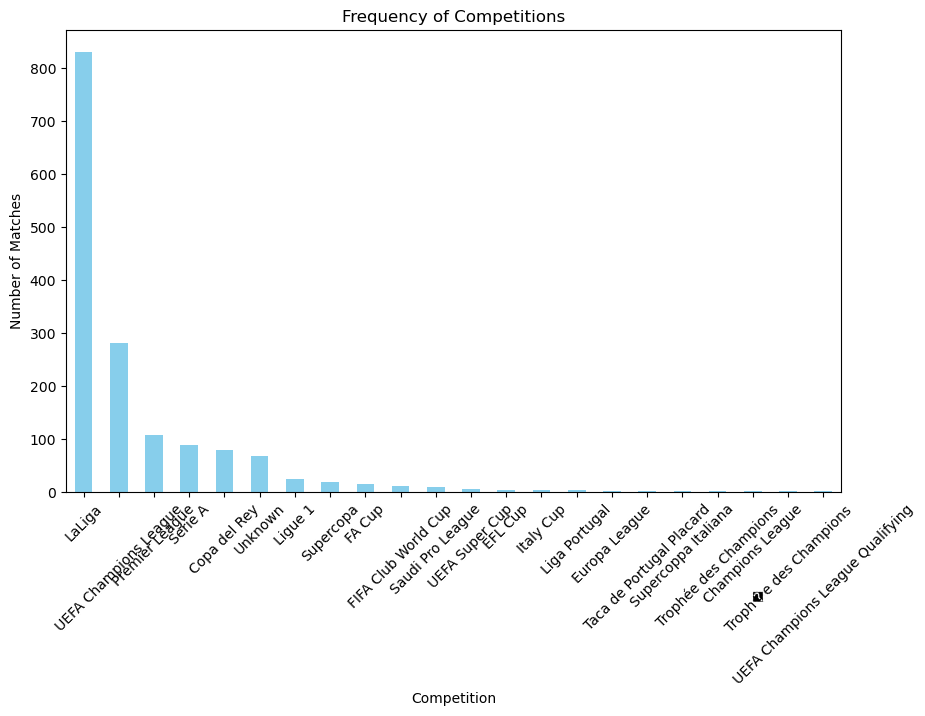

In [32]:
#visualization of data after handling missing values 
# Count occurrences of each competition
competition_counts = data['Competition'].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
competition_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Competitions')
plt.xlabel('Competition')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


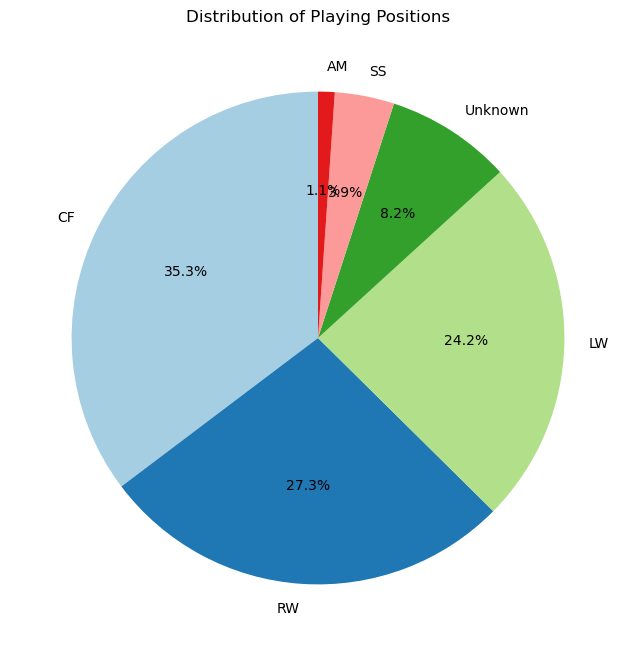

In [34]:
# Count occurrences of each playing position
position_counts = data['Playing_Position'].value_counts()

# Pie plot
plt.figure(figsize=(8, 8))
position_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Playing Positions')
plt.ylabel('')  # Hide the y-label
plt.show()


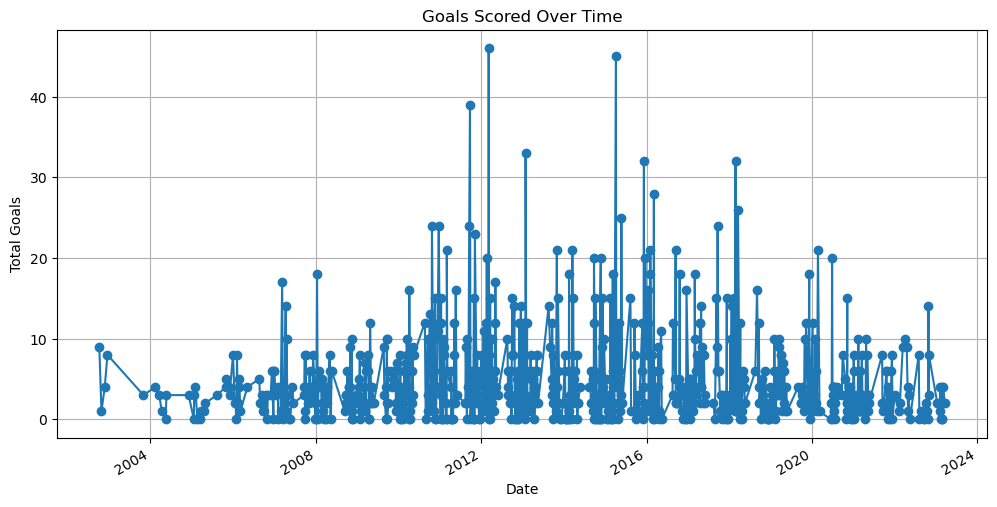

In [40]:
# Extract goals scored from the cleaned Result column, handling NaN values
data['Goals'] = data['Result'].apply(lambda x: int(x.split('-')[0]) if isinstance(x, str) and '-' in x else 0)

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Group by date and sum goals
goals_per_date = data.groupby('Date')['Goals'].sum()

# Line plot
plt.figure(figsize=(12, 6))
goals_per_date.plot(kind='line', marker='o')
plt.title('Goals Scored Over Time')
plt.xlabel('Date')
plt.ylabel('Total Goals')
plt.grid()
plt.show()


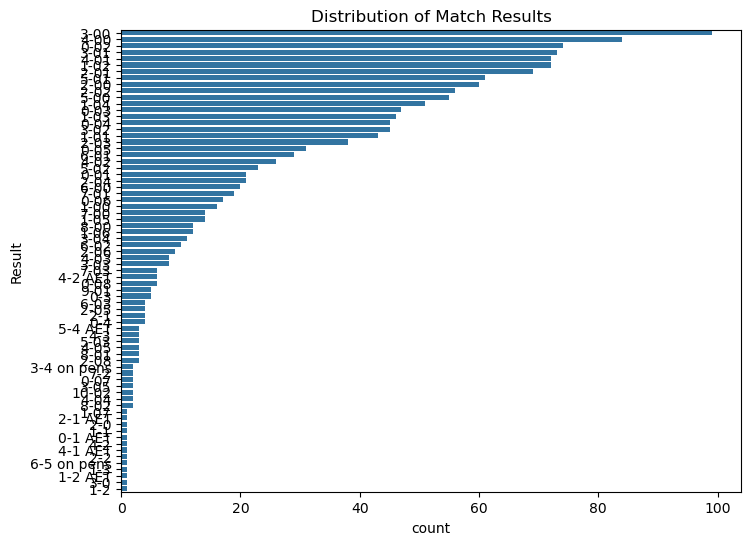

Result Distribution:
Result
3-00           99
4-00           84
0-02           74
3-01           73
4-01           72
               ..
6-5 on pens     1
1-3             1
1-2 AET         1
3-0             1
1-2             1
Name: count, Length: 72, dtype: int64


In [42]:
#Finding underlying trends and insights 
#1. Analyzing Match Results and Outcomes:
# Distribution of match results
result_distribution = data['Result'].value_counts()

# Plot the distribution of match results
plt.figure(figsize=(8, 6))
sns.countplot(y='Result', data=data, order=data['Result'].value_counts().index)
plt.title('Distribution of Match Results')
plt.show()

print("Result Distribution:")
print(result_distribution)


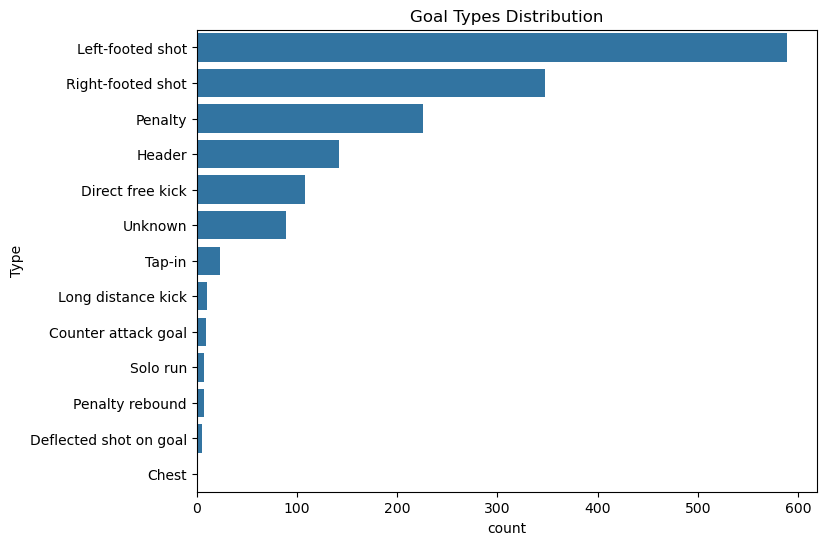

Goal Type Distribution:
Type
Left-footed shot          589
Right-footed shot         348
Penalty                   226
Header                    142
Direct free kick          108
Unknown                    89
Tap-in                     23
Long distance kick         10
Counter attack goal         9
Solo run                    7
Penalty rebound             7
Deflected shot on goal      5
Chest                       1
Name: count, dtype: int64


In [44]:
#2. Analyzing Goals Scored by Type:
# Distribution of goal types
goal_type_distribution = data['Type'].value_counts()

# Plot the distribution of goal types
plt.figure(figsize=(8, 6))
sns.countplot(y='Type', data=data, order=data['Type'].value_counts().index)
plt.title('Goal Types Distribution')
plt.show()

print("Goal Type Distribution:")
print(goal_type_distribution)


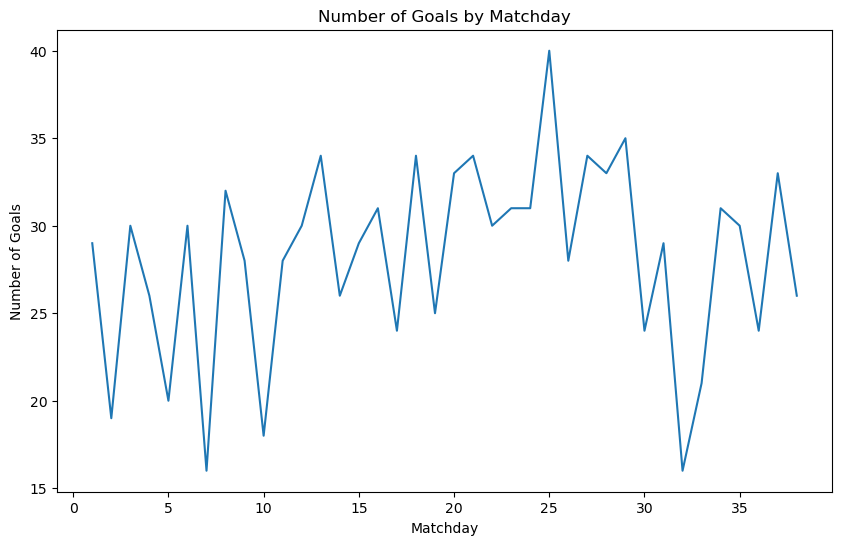

Goals by Matchday Trend:
Matchday
1.0     29
2.0     19
3.0     30
4.0     26
5.0     20
6.0     30
7.0     16
8.0     32
9.0     28
10.0    18
11.0    28
12.0    30
13.0    34
14.0    26
15.0    29
16.0    31
17.0    24
18.0    34
19.0    25
20.0    33
21.0    34
22.0    30
23.0    31
24.0    31
25.0    40
26.0    28
27.0    34
28.0    33
29.0    35
30.0    24
31.0    29
32.0    16
33.0    21
34.0    31
35.0    30
36.0    24
37.0    33
38.0    26
Name: At_score, dtype: int64


In [46]:
#3. Trend of Goals by Matchday:
# Convert 'Matchday' to numeric for analysis
data['Matchday'] = pd.to_numeric(data['Matchday'], errors='coerce')

# Average 'At_score' by Matchday
score_by_matchday = data.groupby('Matchday')['At_score'].count()

# Plotting the trend of goals by matchday
plt.figure(figsize=(10, 6))
score_by_matchday.plot(kind='line')
plt.title('Number of Goals by Matchday')
plt.xlabel('Matchday')
plt.ylabel('Number of Goals')
plt.show()

print("Goals by Matchday Trend:")
print(score_by_matchday)


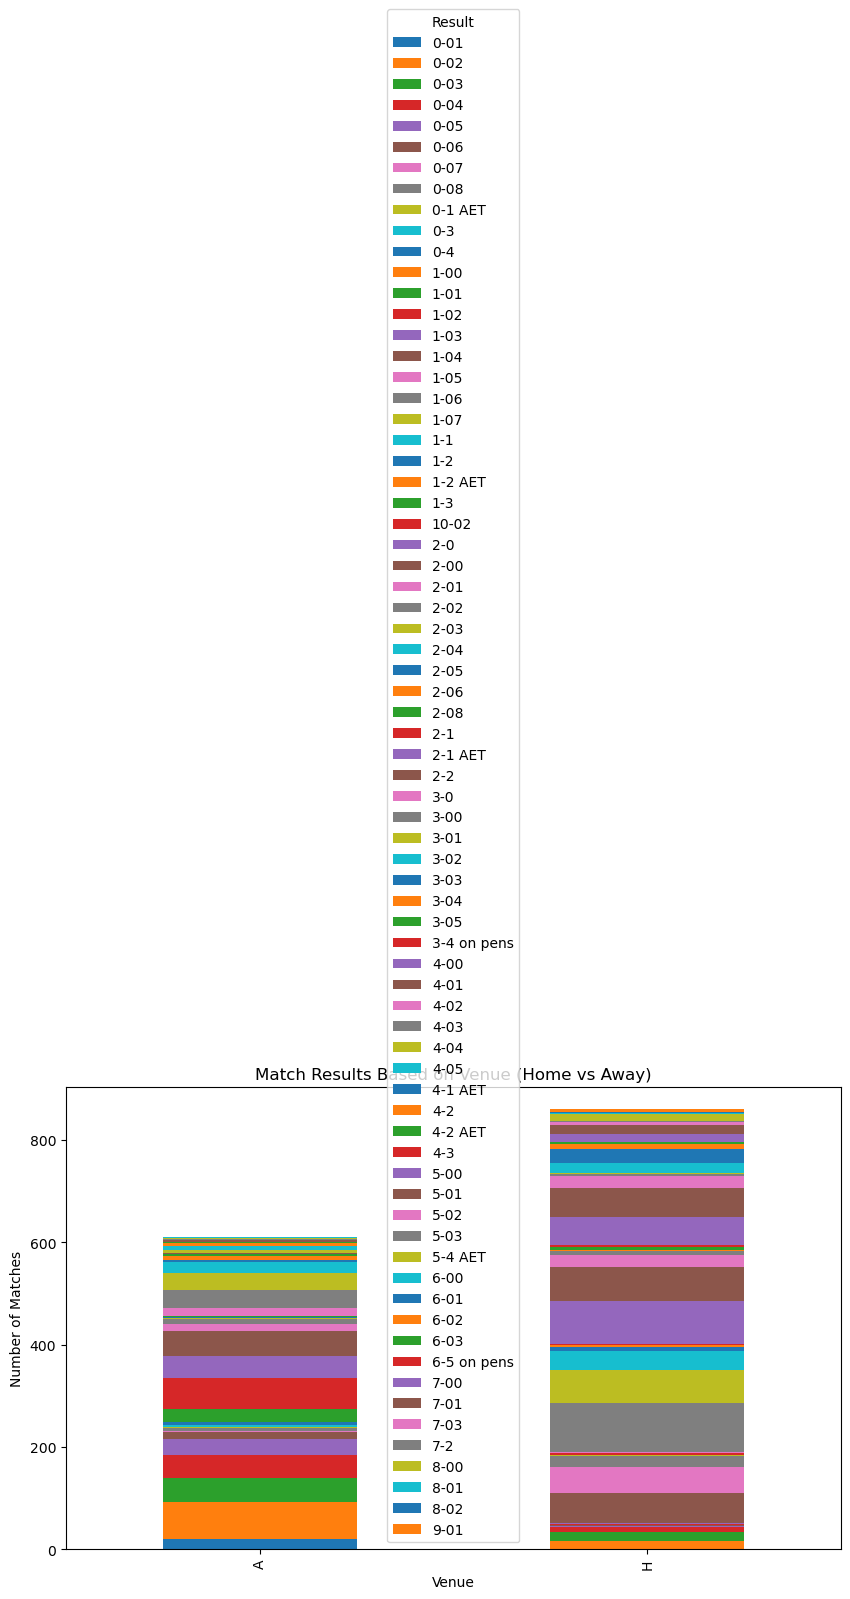

Venue Performance Comparison (Home vs Away):
Result  0-01  0-02  0-03  0-04  0-05  0-06  0-07  0-08  0-1 AET  0-3  ...  \
Venue                                                                 ...   
A       20.0  73.0  46.0  45.0  31.0  15.0   2.0   6.0      1.0  5.0  ...   
H        1.0   1.0   1.0   NaN   NaN   NaN   NaN   NaN      NaN  NaN  ...   

Result  6-03  6-5 on pens  7-00  7-01  7-03  7-2  8-00  8-01  8-02  9-01  
Venue                                                                     
A        NaN          NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  
H        4.0          1.0  14.0  19.0   6.0  2.0  12.0   3.0   2.0   5.0  

[2 rows x 72 columns]


In [48]:
#4. Home vs Away Performance:
# Performance based on venue
venue_performance = data.groupby('Venue')['Result'].value_counts().unstack()

# Plot venue performance
venue_performance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Match Results Based on Venue (Home vs Away)')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.show()

print("Venue Performance Comparison (Home vs Away):")
print(venue_performance)


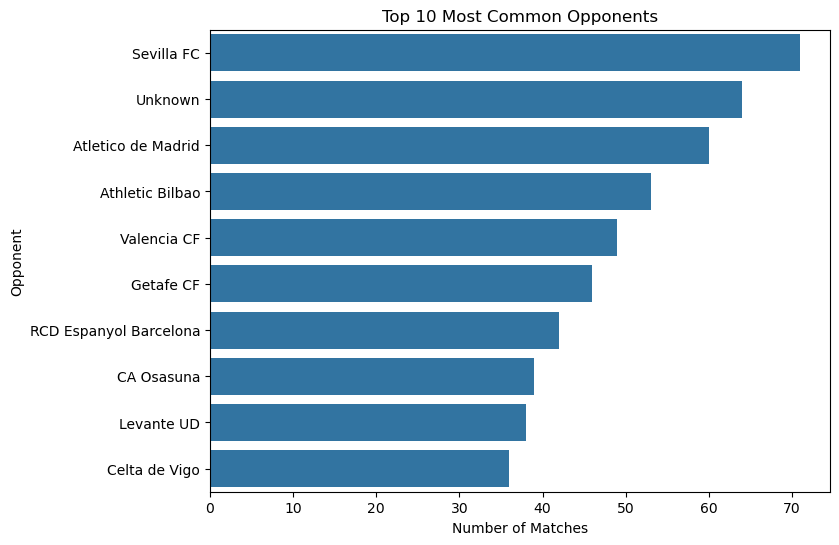

Top 10 Opponents:
Opponent
Sevilla FC                71
Unknown                   64
Atletico de Madrid        60
Athletic Bilbao           53
Valencia CF               49
Getafe CF                 46
RCD Espanyol Barcelona    42
CA Osasuna                39
Levante UD                38
Celta de Vigo             36
Name: count, dtype: int64


In [50]:
#5. Most Common Opponents:
# Most common opponents
common_opponents = data['Opponent'].value_counts().head(10)

# Plot the most common opponents
plt.figure(figsize=(8, 6))
sns.barplot(x=common_opponents.values, y=common_opponents.index)
plt.title('Top 10 Most Common Opponents')
plt.xlabel('Number of Matches')
plt.ylabel('Opponent')
plt.show()

print("Top 10 Opponents:")
print(common_opponents)


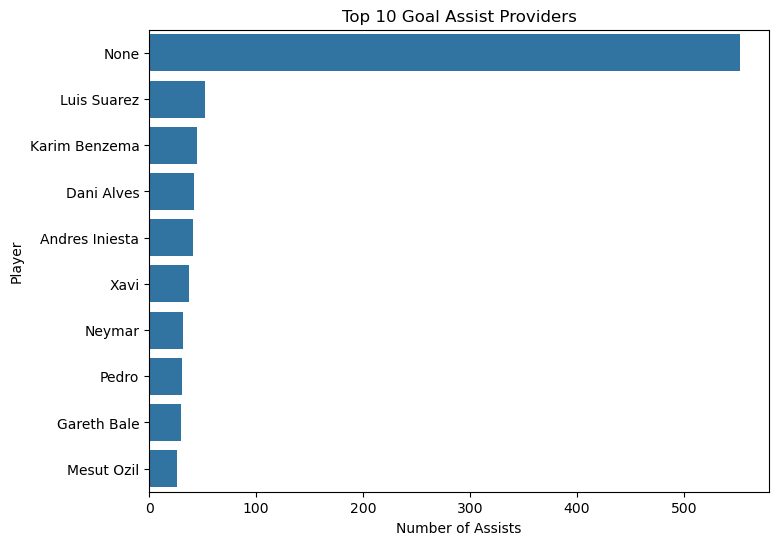

Goal Assist Distribution:
Goal_assist
None              552
Luis Suarez        52
Karim Benzema      45
Dani Alves         42
Andres Iniesta     41
Xavi               37
Neymar             32
Pedro              31
Gareth Bale        30
Mesut Ozil         26
Name: count, dtype: int64


In [52]:
#6. Analyzing Goal Assists:
# Most common goal assist providers
goal_assist_distribution = data['Goal_assist'].value_counts().head(10)

# Plot goal assists distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=goal_assist_distribution.values, y=goal_assist_distribution.index)
plt.title('Top 10 Goal Assist Providers')
plt.xlabel('Number of Assists')
plt.ylabel('Player')
plt.show()

print("Goal Assist Distribution:")
print(goal_assist_distribution)


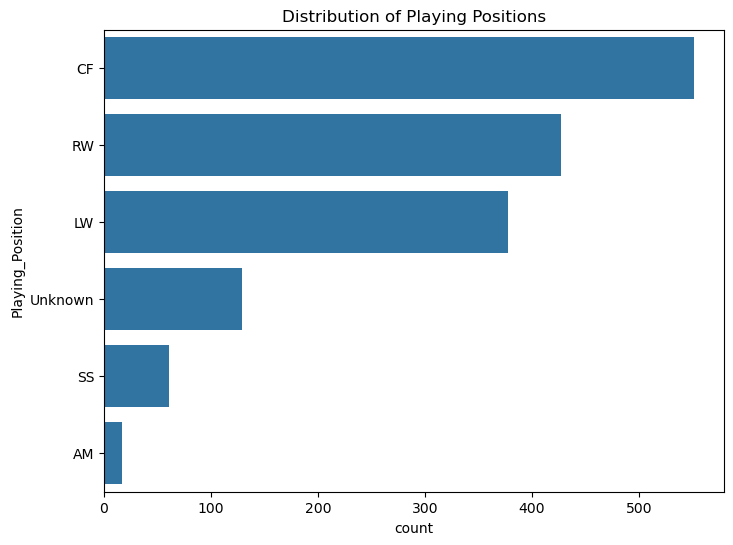

Playing Position Distribution:
Playing_Position
CF         552
RW         427
LW         378
Unknown    129
SS          61
AM          17
Name: count, dtype: int64


In [54]:
#7. Analyzing Playing Positions:
# Distribution of playing positions
position_distribution = data['Playing_Position'].value_counts()

# Plot playing positions
plt.figure(figsize=(8, 6))
sns.countplot(y='Playing_Position', data=data, order=data['Playing_Position'].value_counts().index)
plt.title('Distribution of Playing Positions')
plt.show()

print("Playing Position Distribution:")
print(position_distribution)


In [ ]:
##Observations from these Insights:
Match Results: Identify whether the team tends to win, lose, or draw more frequently.
Goal Types: Insights into the most frequent goal types (headers, free kicks, etc.).
Home vs Away: Patterns in performance when playing at home vs away.
Top Opponents: Common teams faced and the outcomes of these matches.
Goal Assists: Who assists the most, or how often goals are assisted.

In [74]:
#Pay close attention to the data to find any anomalies and outliers which lead to unusual inferences.
# Descriptive statistics
print(data.describe(include='all'))


       Season Competition Matchday          Date Venue          Club  \
count    1564        1564     1564          1564  1564          1564   
unique     23          22       39           823     3             8   
top     14/15      LaLiga  Unknown  Unknown Date     H  FC Barcelona   
freq      127         831      492            66   875           717   
mean      NaN         NaN      NaN           NaN   NaN           NaN   
std       NaN         NaN      NaN           NaN   NaN           NaN   
min       NaN         NaN      NaN           NaN   NaN           NaN   
25%       NaN         NaN      NaN           NaN   NaN           NaN   
50%       NaN         NaN      NaN           NaN   NaN           NaN   
75%       NaN         NaN      NaN           NaN   NaN           NaN   
max       NaN         NaN      NaN           NaN   NaN           NaN   

          Opponent Result Playing_Position Minute At_score              Type  \
count         1564   1564             1564   1564     1

In [82]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [106]:
#CHECKING FOR OUTLIERS AND ANOMALIES 
# Helper function for detecting outliers using the IQR method
def detect_outliers_iqr(column):
    if column.dtype in ['int64', 'float64']:
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        outliers = (column < (Q1 - 1.5 * IQR)) | (Q3 + 1.5 * IQR < column)
        return outliers
    return pd.Series([False] * len(column))

# Convert 'Minute' to numeric and handle non-numeric values
data['Minute'] = pd.to_numeric(data['Minute'], errors='coerce')

# Check and standardize date column
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

# Clean non-numeric columns that may contain invalid patterns
# Example: Standardize the 'Result' column (handling non-standard characters)
data['Result'] = data['Result'].replace({'O': '0'}, regex=True)

# Function to detect non-numeric anomalies (e.g., invalid formats, unexpected values)
def detect_non_numeric_anomalies(column):
    if column.name == 'Result':  # Custom check for 'Result' column pattern 'X:X'
        return ~column.str.match(r'^\d{1,2}:\d{1,2}$', na=False)
    elif column.name == 'Season':  # Custom check for 'Season' to follow 'YY/YY' format
        return ~column.str.match(r'^\d{2}/\d{2}$', na=False)
    elif column.name == 'Competition':  # Check for NaNs or unexpected competition names
        return column.isnull()
    else:  # General check for NaNs in other non-numeric columns
        return column.isnull()

# Detect anomalies (outliers for numeric and invalid patterns for non-numeric)
outliers_dict = {}
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:  # Detect numeric outliers
        outliers_dict[column] = detect_outliers_iqr(data[column])
    else:  # Detect non-numeric anomalies
        outliers_dict[column] = detect_non_numeric_anomalies(data[column])

# Create a dataframe showing where anomalies are detected
outliers_df = pd.DataFrame(outliers_dict)

# Optionally, display rows with anomalies or outliers
anomalies = data[outliers_df.any(axis=1)]

anomalies.head()  # Display anomalies found



,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Goals
0,15/16,LaLiga,26.0,2016-02-28,H,FC Barcelona,Sevilla FC,2-01,RW,31.0,1:01,Direct free kick,None,2
1,20/21,Unknown,Unknown,NaT,A,FC Barcelona,Unknown,1-00,Unknown,89.0,0:0,Unknown,None,1
2,16/17,LaLiga,25.0,2017-03-01,H,FC Barcelona,Sporting GijÃ³n,6-01,RW,9.0,1:00,Header,Javier Mascherano,6
3,Dec-13,LaLiga,36.0,2013-05-08,H,Real Madrid,Malaga CF,6-02,LW,26.0,2:01,Right-footed shot,Xabi Alonso,6
4,22/23,UEFA Champions League,Unknown,2022-10-05,A,Paris Saint-Germain,SL Benfica,1-1,AM,22.0,0:1,Left-footed shot,Neymar,1


In [112]:
#HANDLING OUTLIERS 
# Define the function to remove outliers based on IQR for numerical columns
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    # Filter out rows that are outside the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Select numerical columns (outliers will be handled here)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Remove outliers for numerical columns
for col in numerical_columns:
    print(f'Handling outliers for column: {col}')
    data = remove_outliers(data, col)

# Check the updated summary statistics after handling outliers and anomalies
print(data.describe(include='all'))



Handling outliers for column: Minute
Handling outliers for column: Goals
       Season Competition Matchday                           Date Venue  \
count    1494        1494     1494                           1428  1494   
unique     23          22       39                            NaN     3   
top     14/15      LaLiga  Unknown                            NaN     H   
freq      118         791      471                            NaN   830   
mean      NaN         NaN      NaN  2014-05-20 09:03:31.764706048   NaN   
min       NaN         NaN      NaN            2002-10-07 00:00:00   NaN   
25%       NaN         NaN      NaN            2011-02-03 06:00:00   NaN   
50%       NaN         NaN      NaN            2014-03-16 00:00:00   NaN   
75%       NaN         NaN      NaN            2017-10-29 00:00:00   NaN   
max       NaN         NaN      NaN            2023-03-18 00:00:00   NaN   
std       NaN         NaN      NaN                            NaN   NaN   

                Club    Op

In [110]:
#HANDLING ANOMALIES 
# Define the function to handle categorical anomalies
def clean_categorical(df, col):
    # Check unique categories and their frequencies
    print(f'Unique values in {col}:')
    print(df[col].value_counts())
    
    # Manually inspect and handle anomalies like typos or inconsistent values
    # This example doesn't fix them automatically, but you can manually add replacements
    # Example: df[col] = df[col].replace({'TypoValue': 'CorrectValue'})
    
    return df


# Select categorical columns (anomalies will be handled here)
categorical_columns = data.select_dtypes(include=['object']).columns

# Clean categorical columns by detecting anomalies
for col in categorical_columns:
    print(f'Handling anomalies for categorical column: {col}')
    data = clean_categorical(data, col)


Handling anomalies for categorical column: Season
Unique values in Season:
Season
14/15      118
Dec-13     117
10/11      109
16/17      100
13/14       92
17/18       92
15/16       91
18/19       83
09/10       80
20/21       79
11-Dec      77
19/20       65
08/09       64
11-12       63
07/08       59
Unknown     53
21/22       40
06/07       40
22/23       31
05/06       21
04/05        8
03/04        7
02/03        5
Name: count, dtype: int64
Handling anomalies for categorical column: Competition
Unique values in Competition:
Competition
LaLiga                              791
UEFA Champions League               269
Premier League                      106
Serie A                              84
Copa del Rey                         78
Unknown                              67
Ligue 1                              24
Supercopa                            18
FA Cup                               12
FIFA Club World Cup                  10
Saudi Pro League                      9
UEFA Super

In [19]:
data.isnull().sum()

Season                53
Competition            0
Matchday               0
Date                1032
Venue                 60
Club                  56
Opponent              64
Result                64
Playing_Position     129
Minute                64
At_score              57
Type                  89
Goal_assist          552
dtype: int64

In [21]:
#HANDLING MISSING VALUES 
# Function to clean the dates, replacing wrong characters
def clean_dates(date):
    if isinstance(date, str):
        date = date.replace('O', '0').replace('-', '/')
    return date

# Apply date correction
data['Date'] = data['Date'].apply(clean_dates)

# Replace 'O' with '0' for incorrect numeric values in relevant columns
def clean_numeric_values(value):
    if isinstance(value, str):
        value = value.replace('O', '0')
    return value

# Apply numeric correction to relevant columns
data['Season'] = data['Season'].apply(clean_numeric_values)
data['Matchday'] = data['Matchday'].apply(clean_numeric_values)
data['Result'] = data['Result'].apply(clean_numeric_values)
data['Minute'] = data['Minute'].apply(clean_numeric_values)
data['At_score'] = data['At_score'].apply(clean_numeric_values)

# Fill missing values by directly assigning back to the column
data['Competition'] = data['Competition'].fillna('Unknown')
data['Matchday'] = data['Matchday'].fillna('Unknown')
data['Playing_Position'] = data['Playing_Position'].fillna('Unknown')
data['Opponent'] = data['Opponent'].fillna('Unknown')
data['Type'] = data['Type'].fillna('Unknown')
data['Goal_assist'] = data['Goal_assist'].fillna('None')
data['At_score'] = data['At_score'].fillna('0:0')

# Fill missing values
data['Season'] = data['Season'].fillna('Unknown')
data['Matchday'] = data['Matchday'].fillna('Unknown')
data['Date'] = data['Date'].fillna('Unknown Date')
data['Venue'] = data['Venue'].fillna('Unknown')
data['Club'] = data['Club'].fillna('Unknown')
data['Result'] = data['Result'].fillna('N/A')
data['Minute'] = data['Minute'].fillna('0')

# Check the cleaned data
data.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,15/16,LaLiga,26,2016-02-28 00:00:00,H,FC Barcelona,Sevilla FC,2:01,RW,31,1:01,Direct free kick,None
1,20/21,Unknown,Unknown,Unknown Date,A,FC Barcelona,Unknown,1:00,Unknown,89,0:0,Unknown,None
2,16/17,LaLiga,25,Unknown Date,H,FC Barcelona,Sporting Gijón,6:01,RW,9,1:00,Header,Javier Mascherano
3,12/13,LaLiga,36,Unknown Date,H,Real Madrid,Malaga CF,6:02,LW,26,2:01,Right-footed shot,Xabi Alonso
4,22/23,UEFA Champions League,Group Stage,Unknown Date,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,0:1,Left-footed shot,Neymar


In [23]:
data.isnull().sum()

Season              0
Competition         0
Matchday            0
Date                0
Venue               0
Club                0
Opponent            0
Result              0
Playing_Position    0
Minute              0
At_score            0
Type                0
Goal_assist         0
dtype: int64

In [27]:
data.to_excel('cleaned_data1.xlsx', index=False)